In [86]:
from __future__ import print_function
import nilearn.plotting as nip
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,fixed
import inspect

class NiWidget:
    def __init__(self,filename,plotthis='dataobj'):
        self.filename = filename
        
    
    def plot_slices(self,data,x, y, z, Colormap='viridis',figsize=(15,5)):
        """
        plots x,y,z slices
        """
        fig,axes=plt.subplots(1,3, figsize = figsize)
        axes[0].imshow(np.rot90(data[:,y,:]), cmap = Colormap)
        axes[1].imshow(np.rot90(data[x,:,:]), cmap = Colormap)
        axes[2].imshow(np.rot90(data[:,:,z]), cmap = Colormap)
        plt.show()
        
    def default_plotter(self,**kwargs):
        """
        if no plotting function is specified: use default
        """
        
        self.data = nib.load(self.filename).dataobj
        
        if len(kwargs) == 0:
            kwargs = {'x': (0,self.data.shape[0]-1),
                         'y': (0,self.data.shape[1]-1),
                         'z': (0,self.data.shape[2]-1),
                         'Colormap': ['viridis','jet','gray'],
                         'figsize': fixed((15,5))
                     }
            
        interact(self.plot_slices,
                data = fixed(self.data),**kwargs)

        
    def _custom_plot_wrapper(self,plotting_func,**kwargs):
        """
        plot wrapper for custom function
        """
        plotting_func(**kwargs)
        plt.show()

    def custom_plotter(self,plotting_func,**kwargs):
        """
        starts interactive widget
        """
        
        #gets name first argument, assuming this takes the filename 
        argname = inspect.getargspec(plotting_func).args[0]
        kwargs[argname] = fixed(self.filename)
        interact(self._custom_plot_wrapper,plotting_func=fixed(plotting_func),**kwargs)
        
    def nifti_plotter(self,plotting_func=None,**kwargs):

        #if no plotting function is specified: use default
        if plotting_func is None:
            self.data = nib.load(self.filename).dataobj
            kwargs = {'x': (0,self.data.shape[0]-1),
                         'y': (0,self.data.shape[1]-1),
                         'z': (0,self.data.shape[2]-1),
                         'Colormap': ['viridis','jet','gray']
                         }         
            interact(self.plot_slices,
                    data = fixed(self.data),**kwargs)

        else:
#             argname = inspect.getargspec(testfunc)[0][0]
#             print(argname,self.filename)
#             kwargs[argname] = fixed(self.filename)
#             print(kwargs)
#             import sys
#             sys.exit('bla')
            interact(plotting_func,**kwargs)

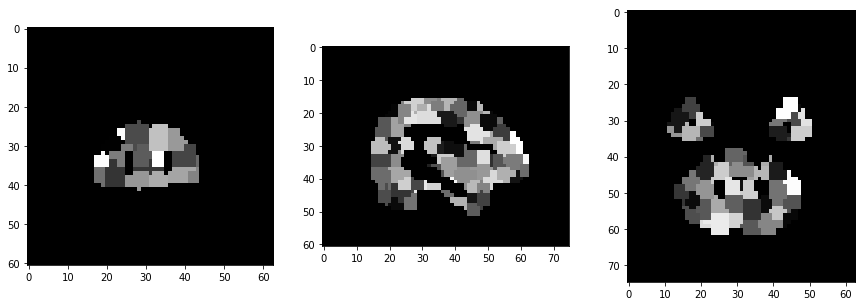

In [87]:
test = NiWidget('Autism-Gradients/cc400_roi_atlas.nii')
test.default_plotter()

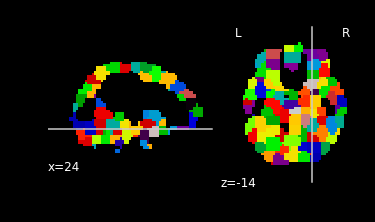

In [88]:
test = NiWidget('Autism-Gradients/cc400_roi_atlas.nii')
testfunc = nip.plot_epi
kwarg_dict = {'display_mode': ['ortho', 'x', 'y', 'z', 'yx', 'xz', 'yz']
             }
test.custom_plotter(testfunc,**kwarg_dict)

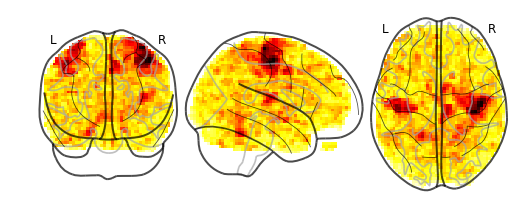

In [89]:
#testing with nilearn datasets
from nilearn import datasets
localizer_dataset = datasets.fetch_localizer_button_task()
localizer_tmap_filename = localizer_dataset.tmaps[0]

test = NiWidget(localizer_tmap_filename)
testfunc = nip.plot_glass_brain
kwarg_dict = {'display_mode': ['ortho','xz','lyrz'],
             'threshold': (0,5)}

test.custom_plotter(testfunc, **kwarg_dict)

In [77]:
nip.plot_roi?

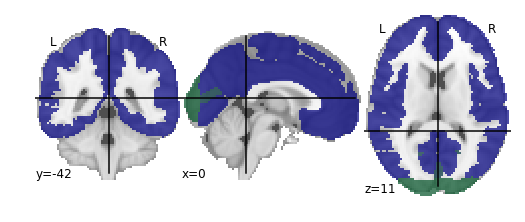

In [90]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
print('Atlas ROIs are located at: %s' % atlas_filename)

test = NiWidget(atlas_filename)
testfunc = nip.plot_roi
kwarg_dict = {'display_mode': ['ortho', 'x', 'y', 'z', 'yx', 'xz', 'yz'],
             'vmin': (0,100),
             'vmax': (0,100)}

test.custom_plotter(testfunc, **kwarg_dict)